In [49]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
income_data = pd.read_csv('../data/income2.csv', index_col=0)
income_data.head()

,Education,Seniority,Income
1,21.586207,113.103448,99.917173
2,18.275862,119.310345,92.579135
3,12.068966,100.689655,34.678727
4,17.034483,187.586207,78.702806
5,19.931034,20.000000,68.009922


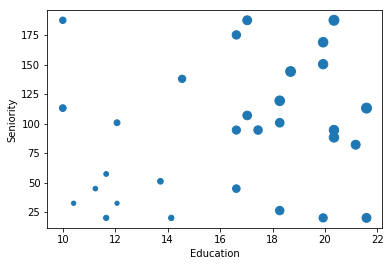

In [13]:
income_data.plot.scatter('Education', 'Seniority', s=income_data.Income)

# Utiliza una regresion lineal para modelar `income_data`

In [25]:
income_data['x0'] = 1 
X = income_data[['x0','Education', 'Seniority']]
X_pseudoinv = np.linalg.pinv(X.values)
X_pseudoinv

array([[ -1.71440766e-01,  -5.11504895e-02,   1.90903328e-01,
         -4.20239861e-02,  -5.88037286e-02,  -3.51877434e-04,
         -1.29921786e-01,  -1.39048289e-01,  -1.11515650e-01,
          2.61428211e-01,   1.56157496e-01,  -8.01563924e-02,
          2.50388398e-01,   2.42342323e-02,   2.20789321e-01,
         -1.14902225e-01,   1.57630760e-01,   5.13268255e-02,
         -1.97912315e-02,  -1.65700837e-01,  -4.09907671e-02,
          7.78262450e-02,  -6.68498032e-03,   2.89994069e-01,
         -1.20642154e-01,   2.52301708e-01,  -1.40081508e-01,
          2.30068953e-01,   2.28155643e-01,   2.00147773e-03],
       [  1.22022872e-02,   3.82825508e-03,  -1.08795241e-02,
         -1.47739501e-03,   1.11741902e-02,   6.88527351e-03,
          6.89436436e-03,   1.22000145e-02,   9.95365551e-03,
         -1.63935208e-02,  -5.16399884e-03,   4.03432902e-03,
         -9.25138698e-03,   5.58344563e-04,  -1.88391356e-02,
          9.74985428e-03,  -3.12371384e-03,   2.18875439e-03,
       

In [32]:
#pseudo inverse
np.dot(np.linalg.inv(np.dot(X.T, X)), X.T)

array([[ -1.71440766e-01,  -5.11504895e-02,   1.90903328e-01,
         -4.20239861e-02,  -5.88037286e-02,  -3.51877434e-04,
         -1.29921786e-01,  -1.39048289e-01,  -1.11515650e-01,
          2.61428211e-01,   1.56157496e-01,  -8.01563924e-02,
          2.50388398e-01,   2.42342323e-02,   2.20789321e-01,
         -1.14902225e-01,   1.57630760e-01,   5.13268255e-02,
         -1.97912315e-02,  -1.65700837e-01,  -4.09907671e-02,
          7.78262450e-02,  -6.68498032e-03,   2.89994069e-01,
         -1.20642154e-01,   2.52301708e-01,  -1.40081508e-01,
          2.30068953e-01,   2.28155643e-01,   2.00147773e-03],
       [  1.22022872e-02,   3.82825508e-03,  -1.08795241e-02,
         -1.47739501e-03,   1.11741902e-02,   6.88527351e-03,
          6.89436436e-03,   1.22000145e-02,   9.95365551e-03,
         -1.63935208e-02,  -5.16399884e-03,   4.03432902e-03,
         -9.25138698e-03,   5.58344563e-04,  -1.88391356e-02,
          9.74985428e-03,  -3.12371384e-03,   2.18875439e-03,
       

In [36]:
w = np.dot(X_pseudoinv, income_data['Income'].values)
w

array([-50.08563875,   5.89555596,   0.17285547])

In [38]:
income_data['guess'] = np.dot(X,w)

In [42]:
RMS = (np.dot(X,w)-income_data['Income'].values)
np.dot(RMS.T, RMS)/len(income_data)

46.482940957746543

In [39]:
income_data

,Education,Seniority,Income,x0,guess
1,21.586207,113.103448,99.917173,1,96.727602
2,18.275862,119.310345,92.579135,1,78.284174
3,12.068966,100.689655,34.678727,1,38.472380
4,17.034483,187.586207,78.702806,1,82.767409
5,19.931034,20.000000,68.009922,1,70.876000
6,18.275862,26.206897,71.504485,1,62.190734
7,19.931034,150.344828,87.970467,1,93.406816
8,21.172414,82.068966,79.811030,1,88.923581
9,20.344828,88.275862,90.006327,1,85.117396
10,10.000000,113.103448,45.655529,1,28.420470


# Grafica el resultado del modelo comparando contra los datos

In [89]:
Xc = np.arange(0, 25, 0.1)
Yc = np.arange(10,200, 0.5)
C = np.ndarray((len(Yc),len(Xc)))
print(C.shape)
for i, x in enumerate(Xc):
    for j, y in enumerate(Yc):
        C[j, i] = w[0] + w[1]*x + w[2]*y

(380, 250)


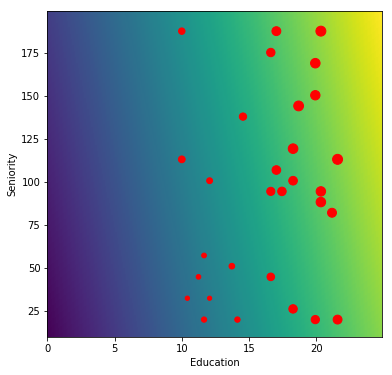

In [91]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.pcolor(Xc, Yc, C)
income_data.plot.scatter('Education', 'Seniority', s=income_data.Income, c='red', ax=ax)